<img style="max-width:20em; height:auto;" src="../graphics/A-Little-Book-on-Adversarial-AI-Cover.png"/>

Author: Nik Alleyne   
Author Blog: https://www.securitynik.com   
Author GitHub: github.com/securitynik   

Author Other Books: [   

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"   
        ]   


This notebook ***(Universal_Function_Approximator.ipynb)*** is part of the series of notebooks From ***A Little Book on Adversarial AI***  A free ebook released by Nik Alleyne

### Universal Function Approximator   

### Lab Objectives:   
- Understanding the universal functional approximation theorem     
- Get an an introduction to neurons    
- Get an introduction to function approximation   
- 
### Step 1:  
Prepare our data  

In [1]:
# Import the libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
### Version of key libraries used  
print(f'Torch version used:  {torch.__version__}')

Torch version used:  2.7.1+cu128


In [3]:
# Setup the device to work with
# This should ensure if there are accelerators in place, such as Apple backend or CUDA, 
# we should be able to take advantage of it.

if torch.cuda.is_available():
    print('Setting the device to cuda')
    device = 'cuda'
elif torch.backends.mps.is_available():
    print('Setting the device to Apple mps')
    device = 'mps'
else:
    print('Setting the device to CPU')
    device = torch.device('cpu')

Setting the device to cuda


In [4]:
# Let's first create some random values
SEED = 99

# Freeze torches random number generator
torch.manual_seed(SEED)

# Setup the distribution
dist = torch.distributions.uniform.Uniform(low=-2.0, high=2.0)
dist

Uniform(low: -2.0, high: 2.0)

In [5]:
# sample 100 points from this distribution
torch.manual_seed(SEED)
X = dist.rsample(sample_shape=(100,))

# Show the first 10 samples
X[:10]

tensor([-1.5868,  1.8806,  1.7923,  1.9148, -0.6929,  1.6801, -1.7989, -0.1667,
         1.4432, -0.0474])

Text(0, 0.5, 'Number of items in bin')

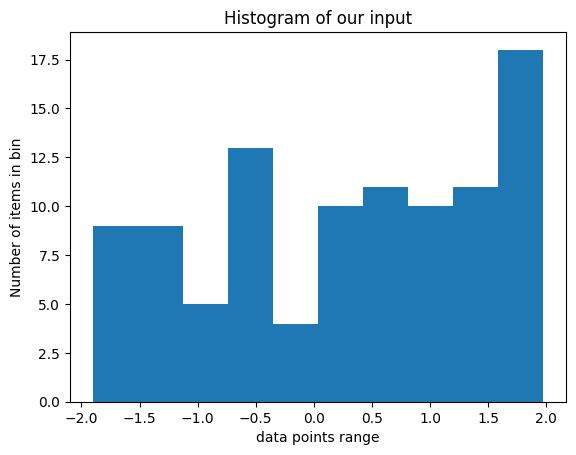

In [6]:
# Visualize the distribution 
plt.title('Histogram of our input')
plt.hist(x=X, bins=10)
plt.xlabel(xlabel='data points range')
plt.ylabel(ylabel='Number of items in bin')

In [7]:
# Since the function is f(x) = x**2
# Let us create a function for this problem   
f = lambda x: x**2

print(f'Testing our function {f(2)}')
# Let's create the target values for ous x
y = f(x=X)

# Viewing the first 10 target values
y[:10]

Testing our function 4


tensor([2.5178e+00, 3.5367e+00, 3.2123e+00, 3.6666e+00, 4.8017e-01, 2.8228e+00,
        3.2360e+00, 2.7800e-02, 2.0827e+00, 2.2450e-03])

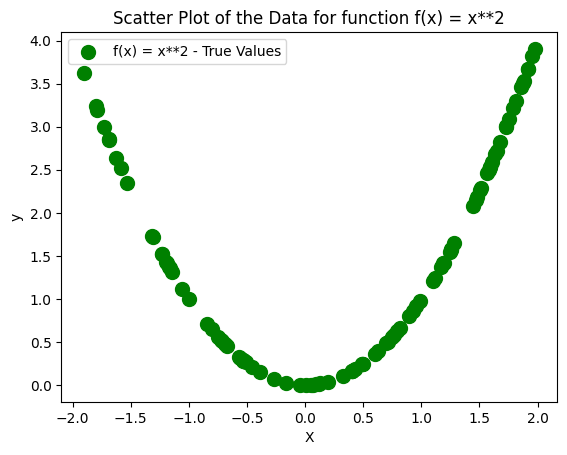

In [8]:
# Let's plot the data
plt.title('Scatter Plot of the Data for function f(x) = x**2')
plt.scatter(X, y, c='g', s=100)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(labels=['f(x) = x**2 - True Values']);

In [9]:
# Before building the model, let's us reshape the data so that each item above represents one row/sample/experiment
X = X.view(size=(-1,1)).to(device=device)
y = y.view(size=(-1,1)).to(device=device)

# Get the shape of the data
X.size(), y.size()

(torch.Size([100, 1]), torch.Size([100, 1]))

In [10]:
# Look at the unsqueezed data
X[:10], y[:10]

(tensor([[-1.5868],
         [ 1.8806],
         [ 1.7923],
         [ 1.9148],
         [-0.6929],
         [ 1.6801],
         [-1.7989],
         [-0.1667],
         [ 1.4432],
         [-0.0474]], device='cuda:0'),
 tensor([[2.5178e+00],
         [3.5367e+00],
         [3.2123e+00],
         [3.6666e+00],
         [4.8017e-01],
         [2.8228e+00],
         [3.2360e+00],
         [2.7800e-02],
         [2.0827e+00],
         [2.2450e-03]], device='cuda:0'))

### Step 2:   
Build our model  

In [11]:
# Building a simple neural network with one hidden layer.
# This is the simplest neural network you can build
# Will this be able to approximate this function?
# This neural network uses PyTorch

class UA_v1(nn.Module):
    def __init__(self):
        super(UA_v1, self).__init__()
        # From input to hidden layer
        self.fc1 = nn.Linear(in_features=1, out_features=8, bias=True)

        # From hidden layer to output layer
        self.fc2 = nn.Linear(in_features=8, out_features=1, bias=True)
        
    def forward(self, x):
        # These layer is basically doing w*x + b, then apply relu activation function
        x = F.relu(input=self.fc1(x))
        x = self.fc2(input=x)
        return x

### Step 3:   
Train the model   

In [12]:
# Set the seed
torch.manual_seed(seed=2)

# Create the model
model = UA_v1().to(device=device)

# Setup the loss function
loss_fn = nn.MSELoss(reduction='mean')

# Setup the optimizer for Gradient Descent
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Training the model
# Play around with the number of epochs to see the different results
num_epochs = 100

# Set the model in train model
model.train(mode=True)

for epoch in range(num_epochs):
    # Forward pass and loss computation
    loss = loss_fn(input=model(X), target=y)

    # Backward pass
    loss.backward()

    # Update the weights
    optimizer.step()

    # Zero the gradients
    optimizer.zero_grad()

    # Print the loss every 100 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/100, Loss: 3.5582706928253174
Epoch 11/100, Loss: 0.595658004283905
Epoch 21/100, Loss: 0.20301179587841034
Epoch 31/100, Loss: 0.04644884541630745
Epoch 41/100, Loss: 0.04119454324245453
Epoch 51/100, Loss: 0.021089911460876465
Epoch 61/100, Loss: 0.01410310622304678
Epoch 71/100, Loss: 0.009178041480481625
Epoch 81/100, Loss: 0.006724298931658268
Epoch 91/100, Loss: 0.004931445699185133


### Step 4:  
Visualizing the result from our training 

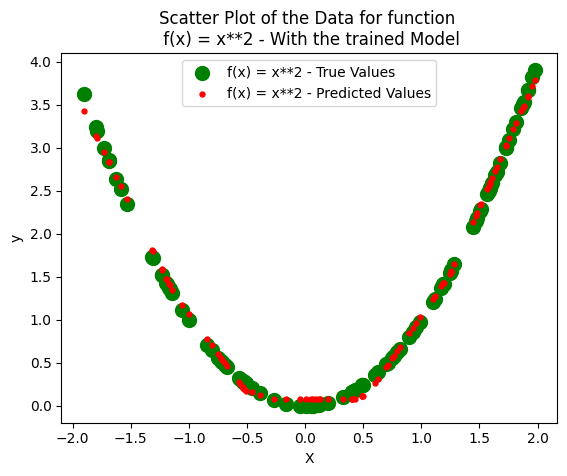

In [13]:
# Plot the function once again, to see if we can approximate it successfully
# Let's plot the data
# Remember to go back and change the number of epochs to see the different results
plt.title('Scatter Plot of the Data for function \n f(x) = x**2 - With the trained Model')
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), c='g', s=100)
plt.scatter(X.cpu().numpy(), model(X).detach().cpu().numpy(), marker='.', c='r', s=50, alpha=1.)
plt.xlabel('X')
plt.ylabel('y');
plt.legend(labels=['f(x) = x**2 - True Values', 'f(x) = x**2 - Predicted Values']);

- Awesome! With just under 100 epochs, our simple one hidden layer neural network, was able approximate our simple function f(x) = x**2.

- As we can see above, the predictions almost maps perfectly to our data.  
- The good thing about the Universal Approximation Theorem, is that we can be as expressive with our architecture as we wish, thus being able to solve more complex tasks.

In [14]:
# With the training finish clear the GPU cache
# Setup the device to work with
if torch.cuda.is_available():
    # For CUDA GPU
    print(f'Cleaning {device} cache')
    torch.cuda.empty_cache()
elif torch.backends.mps.is_available():
    # For Apple devices
    print(f'Cleaning {device} cache')
    torch.mps.empty_cache()
else:
    # Default to cpu
    pass

Cleaning cuda cache


### Lab takeaways   
- We constructed a 1 layer neural network with 1 hidden layer   
- We provided the ReLU activation function on the layer   
- With the one layer, we were able to reconstruct the function pretty well   